In [2]:
#Importing the modules needed for the follwing script

import pandas as pd
import numpy as np

In [21]:
#Reading in the data from the csv file
df1 = pd.read_csv('final_attack_file.csv', header=None, skiprows=1)

# Set the first row as the new header
df1.columns = df1.iloc[0]
df1 = df1[1:]

In [22]:
df_column_1 = df1.iloc[0:2, :]
df_column_1

0     #fields                  ts                       uid id.orig_h  \
1  1688523383  CkYDnA460HPu8jVP45             192.168.0.165     34316   
2  1688523383   CNj1g2C6lJcNyy538  fe80::577:447c:19ae:cff5     38222   

0    id.orig_p id.resp_h id.resp_p proto   service duration  ... conn_state  \
1  224.0.0.251      5353       udp   dns  0.000936       45  ...          -   
2     ff02::fb      5353       udp   dns  0.000944       45  ...          -   

0 local_orig local_resp missed_bytes history orig_pkts orig_ip_bytes  \
1          -          0           CD       1        73             0   
2          -          0           CD       1        93             0   

0 resp_pkts resp_ip_bytes tunnel_parents  
1         0             -            NaN  
2         0             -            NaN  

[2 rows x 22 columns]

In [23]:
df = df1.shift(periods=1, axis=1)
df

0     #fields          ts                 uid                 id.orig_h  \
1        None  1688523383  CkYDnA460HPu8jVP45             192.168.0.165   
2        None  1688523383   CNj1g2C6lJcNyy538  fe80::577:447c:19ae:cff5   
3        None  1688523384  CbTsjF45Y3EcLfMRAe             192.168.0.165   
4        None  1688523384  CL3gnJ3CwPVK32lGJd  fe80::577:447c:19ae:cff5   
5        None  1688523385  C62AUK3DnSlhgIrPba             192.168.0.165   
...       ...         ...                 ...                       ...   
52613    None  1686857466   CLcmuSYKYpP6p6CYe              192.168.1.26   
52614    None  1686857459  C9K5Kv1chV4nUk0GRd              192.168.1.26   
52615    None  1686857510  CWw2Ss4nx6SpvA5QS8              192.168.1.26   
52616    None  1686857467  C0gsXx31QtgI9RVKS7              192.168.1.26   
52617    None  1686857465  C5hQef3vCZLQzxLFq4              192.168.1.26   

0     id.orig_p       id.resp_h id.resp_p proto service  duration  ...  \
1         34316     224.0.0.251      5353   udp     dns  0.000936  ...   
2         38222        ff02::fb      5353   udp     dns  0.000944  ...   
3         60018     224.0.0.251      5353   udp     dns  0.000799  ...   
4         57724        ff02::fb      5353   udp     dns  0.001447  ...   
5         43083     224.0.0.251      5353   udp     dns  0.002282  ...   
...         ...             ...       ...   ...     ...       ...  ...   
52613     56935    132.163.96.2       123   udp     ntp         -  ...   
52614     42699     129.6.15.29       123   udp     ntp         -  ...   
52615     52955   192.36.144.22       123   udp     ntp         -  ...   
52616     36191  131.107.13.100       123   udp     ntp         -  ...   
52617     34069  128.138.140.44       123   udp     ntp         -  ...   

0     conn_state local_orig local_resp missed_bytes history orig_pkts  \
1             S0          -          -            0      CD         1   
2             S0          -          -            0      CD         1   
3             S0          -          -            0      CD         1   
4             S0          -          -            0      CD         1   
5             S0          -          -            0      CD         1   
...          ...        ...        ...          ...     ...       ...   
52613         S0          -          -            0       D         1   
52614         S0          -          -            0       D         1   
52615         S0          -          -            0       D         1   
52616         S0          -          -            0       D         1   
52617         S0          -          -            0       D         1   

0     orig_ip_bytes resp_pkts resp_ip_bytes tunnel_parents  
1                73         0             0              -  
2                93         0             0              -  
3                74         0             0              -  
4                94         0             0              -  
5                57         0             0              -  
...             ...       ...           ...            ...  
52613            76         0             0              -  
52614            76         0             0              -  
52615            76         0             0              -  
52616            76         0             0              -  
52617            76         0             0              -  

[52617 rows x 22 columns]

In [24]:
df=df.dropna(axis=1)
df

0              ts                 uid                 id.orig_h id.orig_p  \
1      1688523383  CkYDnA460HPu8jVP45             192.168.0.165     34316   
2      1688523383   CNj1g2C6lJcNyy538  fe80::577:447c:19ae:cff5     38222   
3      1688523384  CbTsjF45Y3EcLfMRAe             192.168.0.165     60018   
4      1688523384  CL3gnJ3CwPVK32lGJd  fe80::577:447c:19ae:cff5     57724   
5      1688523385  C62AUK3DnSlhgIrPba             192.168.0.165     43083   
...           ...                 ...                       ...       ...   
52613  1686857466   CLcmuSYKYpP6p6CYe              192.168.1.26     56935   
52614  1686857459  C9K5Kv1chV4nUk0GRd              192.168.1.26     42699   
52615  1686857510  CWw2Ss4nx6SpvA5QS8              192.168.1.26     52955   
52616  1686857467  C0gsXx31QtgI9RVKS7              192.168.1.26     36191   
52617  1686857465  C5hQef3vCZLQzxLFq4              192.168.1.26     34069   

0           id.resp_h id.resp_p proto service  duration orig_bytes  ...  \
1         224.0.0.251      5353   udp     dns  0.000936         45  ...   
2            ff02::fb      5353   udp     dns  0.000944         45  ...   
3         224.0.0.251      5353   udp     dns  0.000799         46  ...   
4            ff02::fb      5353   udp     dns  0.001447         46  ...   
5         224.0.0.251      5353   udp     dns  0.002282         29  ...   
...               ...       ...   ...     ...       ...        ...  ...   
52613    132.163.96.2       123   udp     ntp         -          -  ...   
52614     129.6.15.29       123   udp     ntp         -          -  ...   
52615   192.36.144.22       123   udp     ntp         -          -  ...   
52616  131.107.13.100       123   udp     ntp         -          -  ...   
52617  128.138.140.44       123   udp     ntp         -          -  ...   

0     conn_state local_orig local_resp missed_bytes history orig_pkts  \
1             S0          -          -            0      CD         1   
2             S0          -          -            0      CD         1   
3             S0          -          -            0      CD         1   
4             S0          -          -            0      CD         1   
5             S0          -          -            0      CD         1   
...          ...        ...        ...          ...     ...       ...   
52613         S0          -          -            0       D         1   
52614         S0          -          -            0       D         1   
52615         S0          -          -            0       D         1   
52616         S0          -          -            0       D         1   
52617         S0          -          -            0       D         1   

0     orig_ip_bytes resp_pkts resp_ip_bytes tunnel_parents  
1                73         0             0              -  
2                93         0             0              -  
3                74         0             0              -  
4                94         0             0              -  
5                57         0             0              -  
...             ...       ...           ...            ...  
52613            76         0             0              -  
52614            76         0             0              -  
52615            76         0             0              -  
52616            76         0             0              -  
52617            76         0             0              -  

[52617 rows x 21 columns]

In [25]:
df["label"] = 1
df['detailed_label'] = 'malicious'
df.head()

0          ts                 uid                 id.orig_h id.orig_p  \
1  1688523383  CkYDnA460HPu8jVP45             192.168.0.165     34316   
2  1688523383   CNj1g2C6lJcNyy538  fe80::577:447c:19ae:cff5     38222   
3  1688523384  CbTsjF45Y3EcLfMRAe             192.168.0.165     60018   
4  1688523384  CL3gnJ3CwPVK32lGJd  fe80::577:447c:19ae:cff5     57724   
5  1688523385  C62AUK3DnSlhgIrPba             192.168.0.165     43083   

0    id.resp_h id.resp_p proto service  duration orig_bytes  ... local_resp  \
1  224.0.0.251      5353   udp     dns  0.000936         45  ...          -   
2     ff02::fb      5353   udp     dns  0.000944         45  ...          -   
3  224.0.0.251      5353   udp     dns  0.000799         46  ...          -   
4     ff02::fb      5353   udp     dns  0.001447         46  ...          -   
5  224.0.0.251      5353   udp     dns  0.002282         29  ...          -   

0 missed_bytes history orig_pkts orig_ip_bytes resp_pkts resp_ip_bytes  \
1            0      CD         1            73         0             0   
2            0      CD         1            93         0             0   
3            0      CD         1            74         0             0   
4            0      CD         1            94         0             0   
5            0      CD         1            57         0             0   

0 tunnel_parents label detailed_label  
1              -     1      malicious  
2              -     1      malicious  
3              -     1      malicious  
4              -     1      malicious  
5              -     1      malicious  

[5 rows x 23 columns]

In [26]:
#Check the values and info of the df now
df.info() #can see that the Dtypes are not correct as they are all strings
df.shape
df.describe(include='all')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52617 entries, 1 to 52617
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ts              52617 non-null  object
 1   uid             52617 non-null  object
 2   id.orig_h       52617 non-null  object
 3   id.orig_p       52617 non-null  object
 4   id.resp_h       52617 non-null  object
 5   id.resp_p       52617 non-null  object
 6   proto           52617 non-null  object
 7   service         52617 non-null  object
 8   duration        52617 non-null  object
 9   orig_bytes      52617 non-null  object
 10  resp_bytes      52617 non-null  object
 11  conn_state      52617 non-null  object
 12  local_orig      52617 non-null  object
 13  local_resp      52617 non-null  object
 14  missed_bytes    52617 non-null  object
 15  history         52617 non-null  object
 16  orig_pkts       52617 non-null  object
 17  orig_ip_bytes   52617 non-null  object
 18  resp_p

0        label
count  52617.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0

0
ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service           0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
local_orig        0
local_resp        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
tunnel_parents    0
label             0
detailed_label    0
dtype: int64


<Axes: >

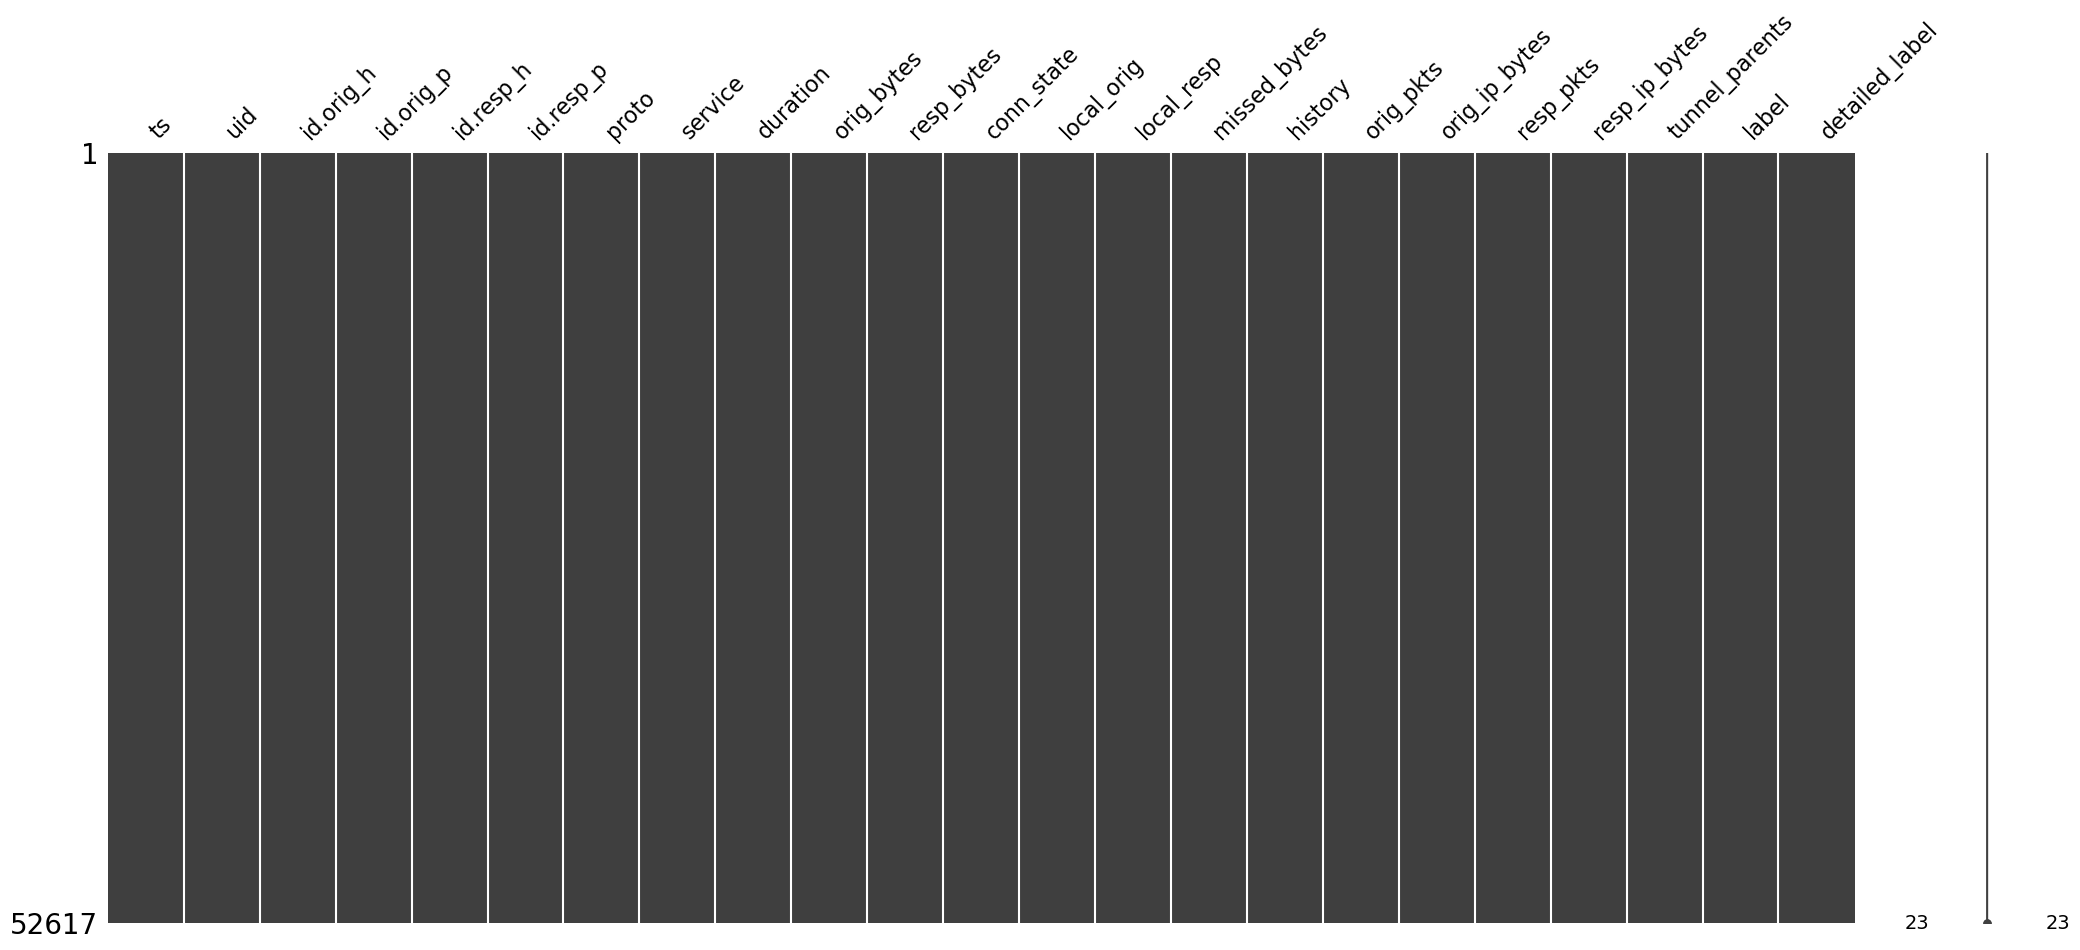

In [27]:
print(df.isnull().sum()) #Checking for any missing values
missingno.matrix(df) #would fill in missing values

#from the output you can see that there are no missing values, only '-' values

In [10]:
!pip install missingno

In [28]:
import missingno

In [29]:
#Note: Check whether those columns are needed
#Dropping tunnel_parents, local_orig, local_resp column as it isnt useful as all the rows are empty
df = df.drop(['tunnel_parents', 'local_orig', 'local_resp'],axis = 1)
#df.head()

In [30]:
#Removing Irrelevant Data
#Reasoning: ts and uid are generated by the zeek program, therefore do not tell us any useful info
df = df.drop(['uid'], axis = 1)

#Update, discussed with team and decided that we need more features

#Checking and dropping duplicate data
df = df.drop_duplicates()
#Drop all rows that contain null values
df = df.dropna(axis = 1)

In [31]:
#df[df['service']=='http']
#df['attack_cat'] = df['attack_cat'].str.strip()

#Trying to automate the proccess of removing any spaces in each column
def Remove_dump_space(df, cols):
    for col in cols:
        df[col] = df[col].str.strip()
    return df

#df.head()

In [32]:
#Dealing with the '-', ?one-hot-encoding? for categorical features
df['proto'].unique() #This is definitely a categorical feature.
#there is no '-'

df['service'].unique() #Here, we'll deal with the type of service that is '-'
#df['service']= np.where(df['service'] == '-', 'None', df['service'])
print(df['service'].unique())

['dns' '-' 'ssl' 'http' 'ntp' 'proto' 'dhcp']


In [34]:
#Trying to automate the process in cell above (changing '-' to None so that it can be converted later to the correct Dtypes)
def Remove_dump_values(df, cols):
    for col in cols:
        df[col] = np.where(df[col] == '-', None, df[col])
    return df

cols = df.columns
data_bin = Remove_dump_values(df, cols)

#df.head()

In [35]:
df.head()

0          ts                 id.orig_h id.orig_p    id.resp_h id.resp_p  \
1  1688523383             192.168.0.165     34316  224.0.0.251      5353   
2  1688523383  fe80::577:447c:19ae:cff5     38222     ff02::fb      5353   
3  1688523384             192.168.0.165     60018  224.0.0.251      5353   
4  1688523384  fe80::577:447c:19ae:cff5     57724     ff02::fb      5353   
5  1688523385             192.168.0.165     43083  224.0.0.251      5353   

0 proto service  duration orig_bytes resp_bytes conn_state missed_bytes  \
1   udp     dns  0.000936         45          0         S0            0   
2   udp     dns  0.000944         45          0         S0            0   
3   udp     dns  0.000799         46          0         S0            0   
4   udp     dns  0.001447         46          0         S0            0   
5   udp     dns  0.002282         29          0         S0            0   

0 history orig_pkts orig_ip_bytes resp_pkts resp_ip_bytes label detailed_label  
1      CD         1            73         0             0     1      malicious  
2      CD         1            93         0             0     1      malicious  
3      CD         1            74         0             0     1      malicious  
4      CD         1            94         0             0     1      malicious  
5      CD         1            57         0             0     1      malicious

In [37]:
df.to_csv('final_attack_file.csv',index=False)

In [36]:
import numpy as np
import pandas as pd

# Define a helper function to handle data type conversion with error handling
def convert_column(df, column_name, dtype):
    try:
        df[column_name] = df[column_name].astype(dtype)
    except (ValueError, TypeError) as e:
        print(f"Error converting column '{column_name}': {e}")

# Convert columns with specified data types
convert_column(df, 'ts', np.int64)
convert_column(df, 'id.resp_p', np.int64)
convert_column(df, 'id.orig_p', np.int64)
convert_column(df, 'proto', str)
convert_column(df, 'service', str)
convert_column(df, 'duration', float)
convert_column(df, 'conn_state', str)
convert_column(df, 'history', str)
convert_column(df, 'orig_pkts', np.int64)
convert_column(df, 'orig_ip_bytes', np.int64)
convert_column(df, 'resp_pkts', np.int64)
convert_column(df, 'resp_ip_bytes', np.int64)
convert_column(df, 'missed_bytes', np.int64)
convert_column(df, 'label', str)
convert_column(df, 'detailed_label', str)
convert_column(df, 'orig_bytes', float)
convert_column(df, 'resp_bytes', float)

# Display the modified DataFrame
df.info()


Error converting column 'ts': invalid literal for int() with base 10: '#fields'
Error converting column 'id.resp_p': invalid literal for int() with base 10: 'id.resp_h'
Error converting column 'id.orig_p': invalid literal for int() with base 10: 'id.orig_h'
Error converting column 'duration': could not convert string to float: 'service'
Error converting column 'orig_pkts': invalid literal for int() with base 10: 'history'
Error converting column 'orig_ip_bytes': invalid literal for int() with base 10: 'orig_pkts'
Error converting column 'resp_pkts': invalid literal for int() with base 10: 'orig_ip_bytes'
Error converting column 'resp_ip_bytes': invalid literal for int() with base 10: 'resp_pkts'
Error converting column 'missed_bytes': invalid literal for int() with base 10: 'local_resp'
Error converting column 'orig_bytes': could not convert string to float: 'duration'
Error converting column 'resp_bytes': could not convert string to float: 'orig_bytes'
<class 'pandas.core.frame.DataFr

In [24]:
df

0              ts                 id.orig_h  id.orig_p        id.resp_h  \
1      1687210609             192.168.0.146    43387.0      192.168.0.1   
2      1687210624             192.168.0.146    53324.0      192.168.0.1   
3      1687210645               192.168.0.1     5353.0      224.0.0.251   
4      1687210645  fe80::e0e:76ff:fedc:1d2f     5353.0         ff02::fb   
5      1687210649             192.168.0.146    55892.0      192.168.0.1   
...           ...                       ...        ...              ...   
37730  1686164129             192.168.0.150    57911.0    52.184.214.53   
37731  1686001074               192.168.0.1    40018.0  239.255.255.250   
37732  1686001074         fdf0:f574:be1e::1    50826.0          ff05::c   
37733  1686001074         fdf0:f574:be1e::1    50826.0          ff0e::c   
37734  1686001074  fe80::e0e:76ff:fedc:1d2f    50826.0          ff02::c   

0      id.resp_p  proto  service     duration orig_bytes resp_bytes  \
1           53.0    NaN      NaN     1.001525          0        121   
2           53.0    NaN      NaN     1.001813          0        866   
3         5353.0    NaN      NaN         None       None       None   
4         5353.0    NaN      NaN         None       None       None   
5           53.0    NaN      NaN     1.001589          0        113   
...          ...    ...      ...          ...        ...        ...   
37730      443.0    NaN      NaN     0.214845       1309       3102   
37731     1900.0    NaN      NaN  163171.7984   52909440          0   
37732     1900.0    NaN      NaN  163171.8002   53148800          0   
37733     1900.0    NaN      NaN  163171.7989   53145196          0   
37734     1900.0    NaN      NaN  163171.8008   53148800          0   

0     conn_state missed_bytes   history orig_pkts orig_ip_bytes resp_pkts  \
1            SHR            0        Cd         0             0         2   
2            SHR            0        Cd         0             0         7   
3             S0            0         D         1           117         0   
4             S0            0         D         1           137         0   
5            SHR            0        Cd         0             0         2   
...          ...          ...       ...       ...           ...       ...   
37730         S1         2433  ShADcgda        12          1801         8   
37731         S0            0         D    119680      56260480         0   
37732         S0            0         D    119680      58893440         0   
37733         S0            0         D    119672      58889452         0   
37734         S0            0         D    119680      58893440         0   

0     resp_ip_bytes label detailed_label  
1               177     0         benign  
2              1062     0         benign  
3                 0     0         benign  
4                 0     0         benign  
5               169     0         benign  
...             ...   ...            ...  
37730          1001     0         benign  
37731             0     0         benign  
37732             0     0         benign  
37733             0     0         benign  
37734             0     0         benign  

[37733 rows x 19 columns]

In [ ]:
df['detailed_label'].value_counts()